<a href="https://colab.research.google.com/github/LPProjects/House-Price-Prediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Price Prediction#
 This is a full project of machine learning, taking the dataset from kaggle, doing the exploration, doing the preprocessing, engineering features, scaling them and then building models and evaluating them.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive 

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Projects/HousePricePrediction/housing.csv")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

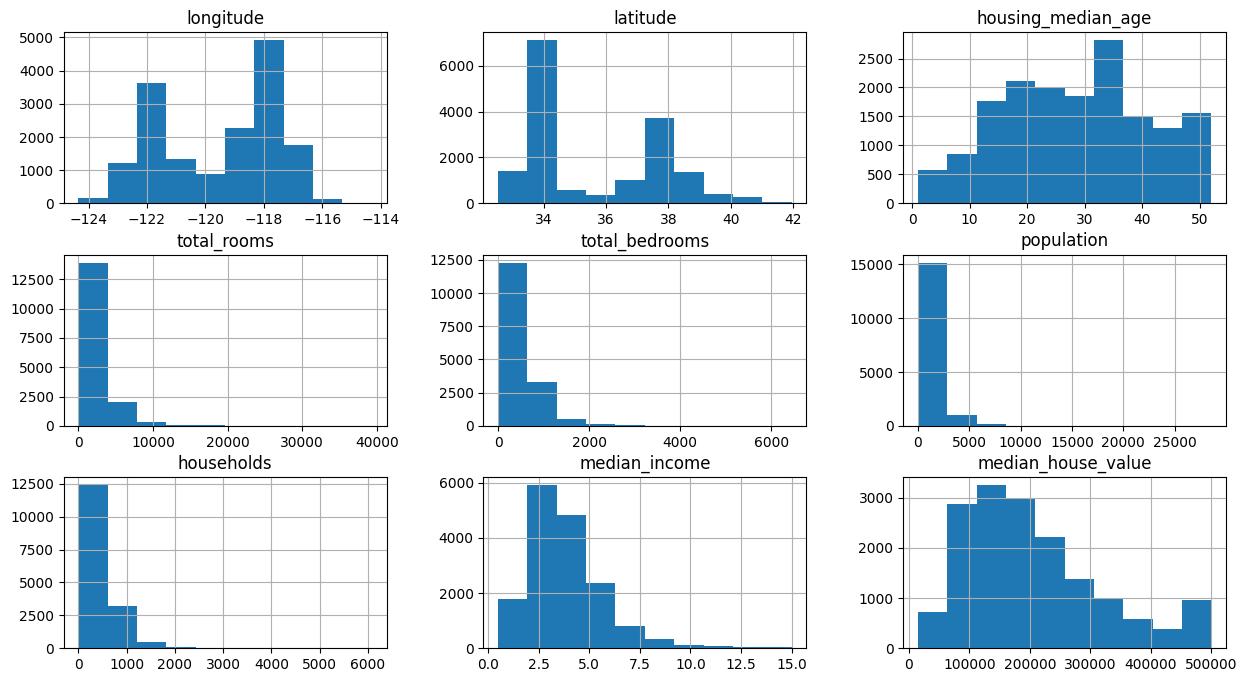

In [ ]:
train_data.hist(figsize=(15,8))

<Axes: >

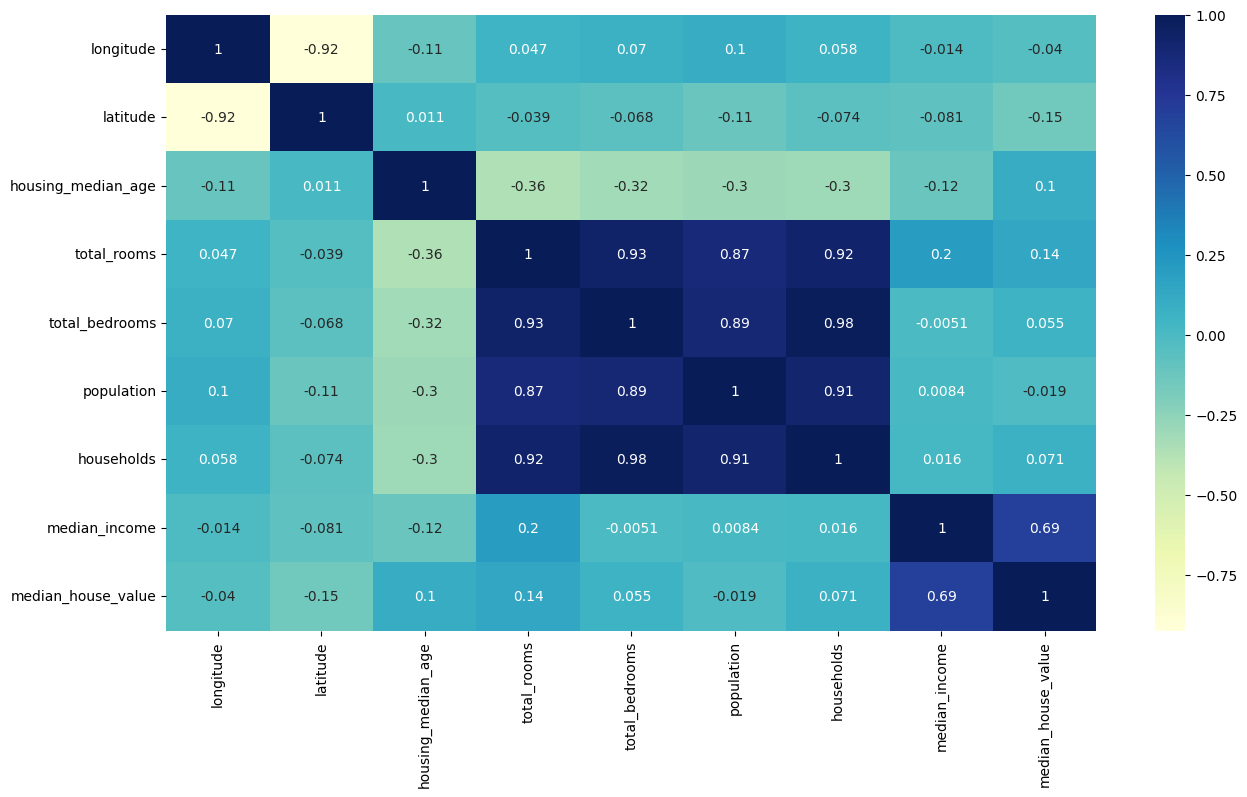

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

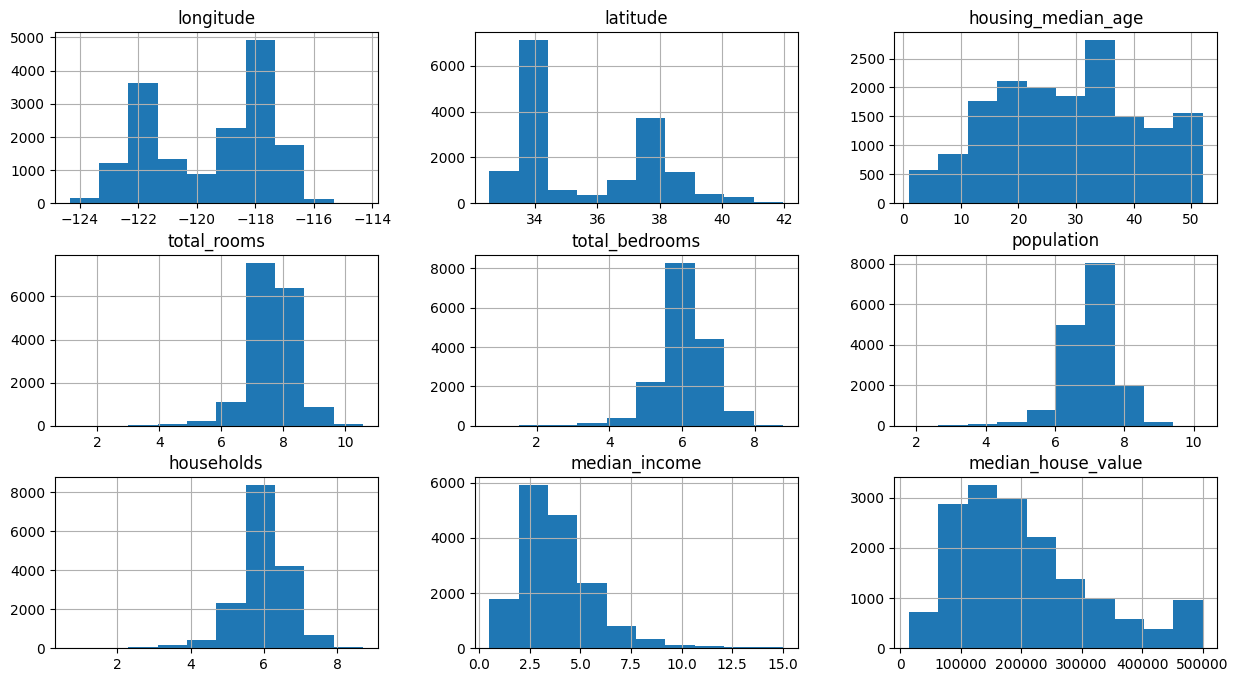

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16899,-122.34,37.59,44.0,7.241366,5.598422,6.602588,5.666427,5.6206,386400.0,0,0,0,0,1
7966,-118.19,33.86,35.0,7.033506,5.693732,6.652863,5.605802,2.2381,137500.0,1,0,0,0,0
308,-122.18,37.77,51.0,7.653495,6.156979,7.068172,6.084499,3.2552,120100.0,0,0,0,1,0
12306,-116.68,33.71,21.0,8.149313,6.568078,6.490724,5.545177,3.5882,161100.0,0,1,0,0,0
16067,-122.48,37.75,52.0,7.637716,5.996452,7.036148,6.016157,4.7703,331000.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12857,-121.38,38.67,37.0,7.685703,6.133398,6.973543,5.880533,2.3958,78400.0,0,1,0,0,0
1530,-122.06,37.88,34.0,8.472614,6.556778,7.539027,6.572283,6.5378,340900.0,0,0,0,1,0
1528,-122.07,37.89,38.0,7.668561,5.840642,6.697034,5.831882,5.5636,268800.0,0,0,0,1,0
7657,-118.26,33.83,28.0,8.321908,6.759255,8.074649,6.735780,4.4539,192200.0,1,0,0,0,0


#Heatmap Correlation Features
With this graphic we can see a lot of corrleation features, for example the houses inland have a negative median_house_value, also we can see that 
<1H OCEAN houses have a positive 
"0.26" median_house_value. 

<Axes: >

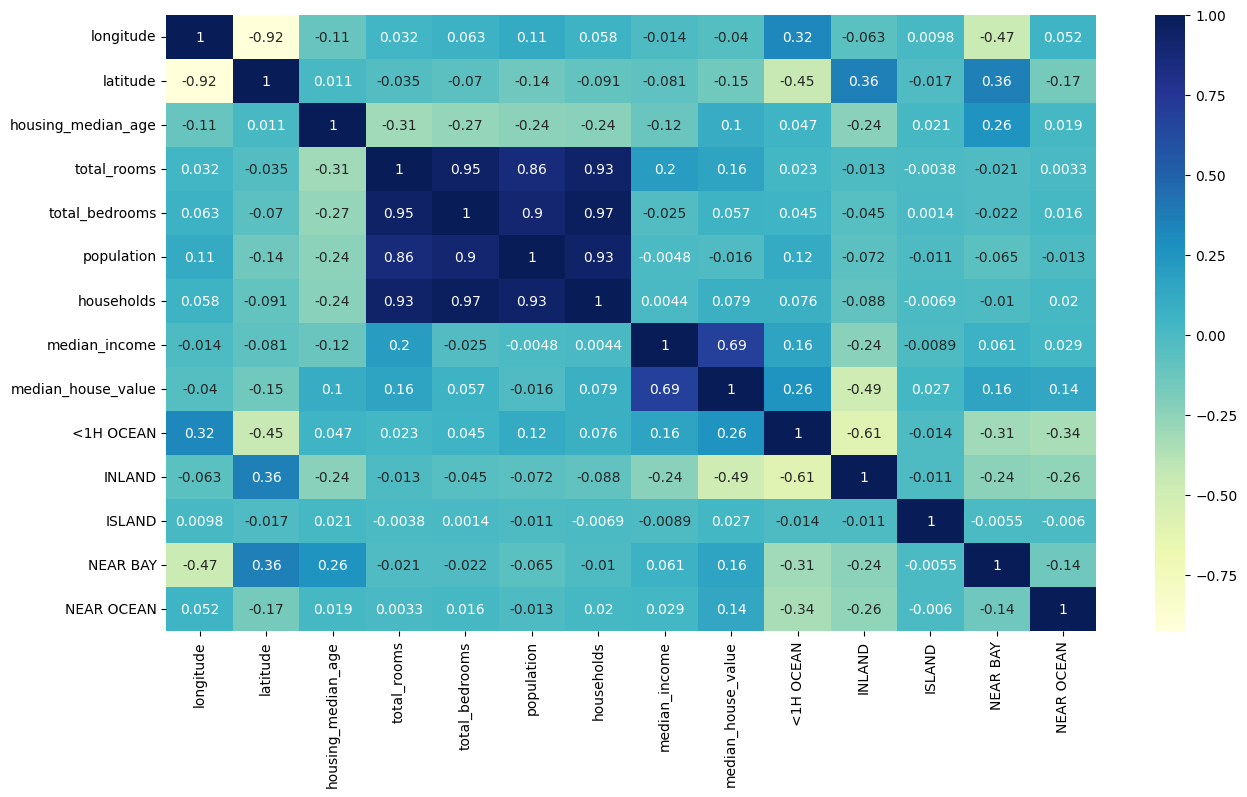

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

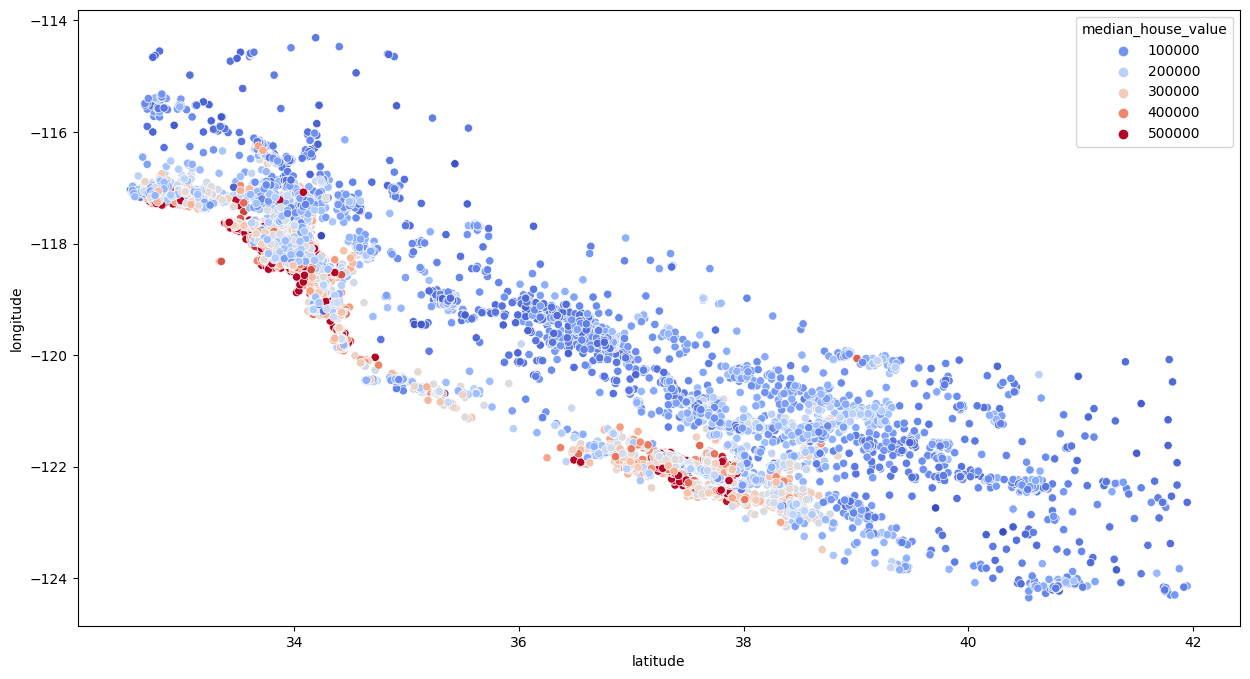

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm");

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

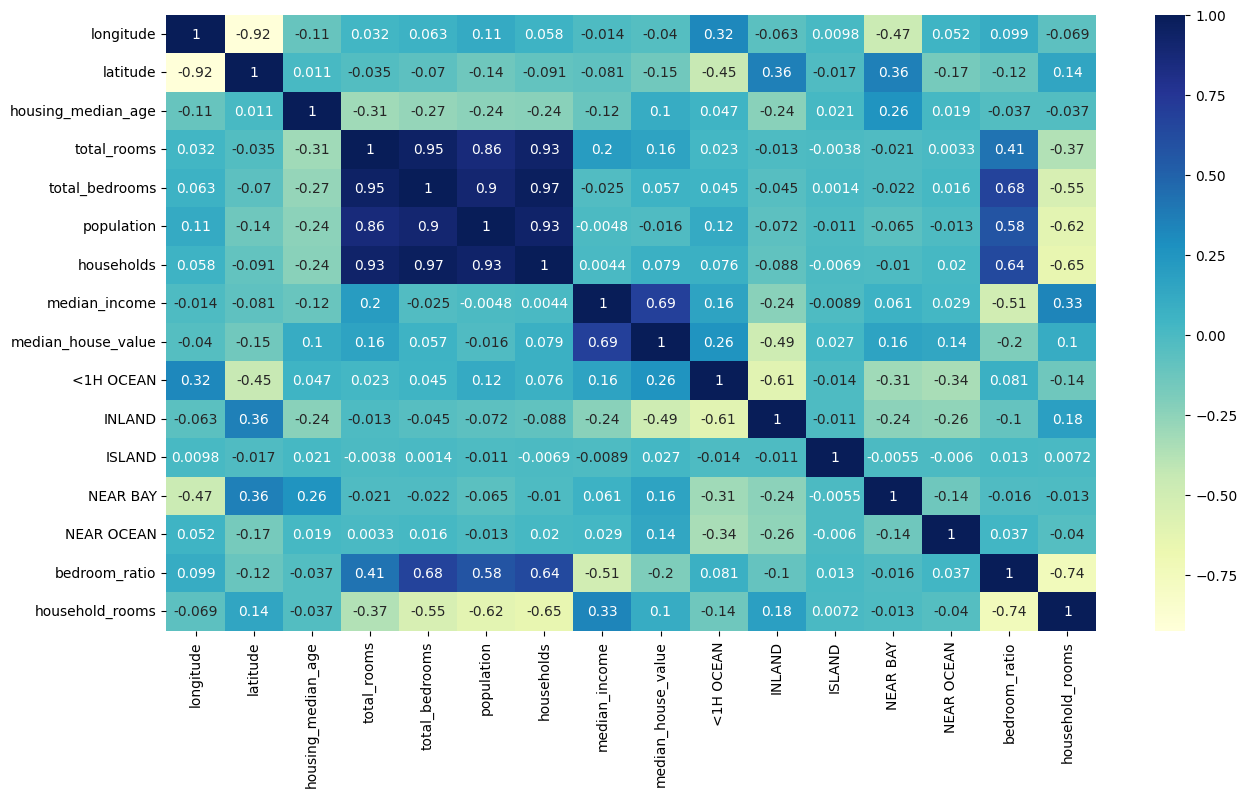

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']    

In [ ]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
reg.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-2130.683206207485

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

In [ ]:
forest.score(X_test_s, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
 
forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[100, 200, 300],
    "min_samples_split":[2,4],
    "max_depth":[None, 4, 8]

}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)


In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.8246941849571314